In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # pd.get_dummies()
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold # cross-validator
from sklearn.model_selection import cross_val_score
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV

# models/estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# models : boost
import xgboost as xgb
import lightgbm

# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
# --------------------------------------------------

# **************************************************

# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)

    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def encode(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df[col] = df[col].map(dict)
    return df[col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def split_xy(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y
# X, y = split_xy(df, 'target')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred)
    accuracy  = accuracy_score   (y_test, y_pred)
    precision = precision_score  (y_test, y_pred)
    recall    = recall_score     (y_test, y_pred)
    c_matrix  = confusion_matrix (y_test, y_pred)
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1        = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    
    print(c_matrix)
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])

    f, ax = plt.subplots(1, 2, figsize=(16, 6))

    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')

    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()

    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')

    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()

    plt.show()

    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------
# --------------------------------------------------


# read

In [2]:
df = pd.read_csv('./kaggle/credit_card_fraud/creditcard_sample.csv')

# check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# split

In [5]:
# 시계열은 split해서 학습하는 데에 다른 특별한 방법 필요
df.drop('Time', axis=1, inplace=True); df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X, y = split_xy(df, 'Class')
X.shape, y.shape

((56962, 29), (56962,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45569, 29), (11393, 29), (45569,), (11393,))

# scale

In [8]:
# scale col ; Amount
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

# 세로 형태 arr만 input 가능하기 때문에 reshape
reshape_X_train = X_train['Amount'].values.reshape(-1, 1)
reshape_X_test  = X_test['Amount'].values.reshape(-1, 1)
print(reshape_X_test.shape, reshape_X_test.shape)

for sc in scalers:
    sc.fit(reshape_X_train)
    
    sc_X_train = sc.transform(reshape_X_train)
    sc_X_test  = sc.transform(reshape_X_test)
    
    # scaling col
    X_train['Amount' + sc.__class__.__name__[:3]] = sc_X_train.reshape(-1, 1)
    X_test['Amount' + sc.__class__.__name__[:3]]  = sc_X_test.reshape(-1, 1)

(11393, 1) (11393, 1)


In [9]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,AmountMin,AmountSta,AmountRob
42345,-2.838559,-0.039808,1.248880,0.022622,-0.562450,1.558225,-0.693506,1.728842,-0.361553,-0.671659,...,0.348250,-0.830101,-0.104357,0.454705,0.374324,-0.281104,105.10,0.008140,0.041796,0.990483
32426,-0.957720,-0.744650,0.847859,-1.349291,-0.027012,-1.269145,0.941633,-0.620563,-0.433626,1.012404,...,0.158579,0.405024,-0.574302,0.788743,0.093828,-0.031024,138.00,0.010689,0.170127,1.402454
48645,-0.246418,1.507680,1.367568,2.517219,-0.345926,0.429856,-0.576798,-2.331898,-1.358382,0.959398,...,0.275977,0.468193,0.483079,-0.094455,0.238044,0.237868,8.99,0.000696,-0.333096,-0.212998
24121,-0.898567,1.296301,0.887681,0.329085,0.912182,-1.323694,1.048802,-0.227076,-0.684641,-1.261214,...,-0.214606,0.254817,0.350808,-0.480854,-0.025142,0.158007,1.00,0.000077,-0.364262,-0.313048
34624,-1.500784,-1.990378,2.414017,-2.319367,-1.528177,-0.107953,-0.336979,0.453382,2.907128,-2.618142,...,0.346152,0.571720,0.602116,-0.690611,0.025956,0.050733,259.46,0.020096,0.643900,2.923366


In [10]:
# shuffle=True이기 때문에, X/y 동일하게 append
X = X_train.append(X_test)
y = y_train.append(y_test)

print(X.shape, y.shape)
X.head()

(56962, 32) (56962,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,AmountMin,AmountSta,AmountRob
42345,-2.838559,-0.039808,1.248880,0.022622,-0.562450,1.558225,-0.693506,1.728842,-0.361553,-0.671659,...,0.348250,-0.830101,-0.104357,0.454705,0.374324,-0.281104,105.10,0.008140,0.041796,0.990483
32426,-0.957720,-0.744650,0.847859,-1.349291,-0.027012,-1.269145,0.941633,-0.620563,-0.433626,1.012404,...,0.158579,0.405024,-0.574302,0.788743,0.093828,-0.031024,138.00,0.010689,0.170127,1.402454
48645,-0.246418,1.507680,1.367568,2.517219,-0.345926,0.429856,-0.576798,-2.331898,-1.358382,0.959398,...,0.275977,0.468193,0.483079,-0.094455,0.238044,0.237868,8.99,0.000696,-0.333096,-0.212998
24121,-0.898567,1.296301,0.887681,0.329085,0.912182,-1.323694,1.048802,-0.227076,-0.684641,-1.261214,...,-0.214606,0.254817,0.350808,-0.480854,-0.025142,0.158007,1.00,0.000077,-0.364262,-0.313048
34624,-1.500784,-1.990378,2.414017,-2.319367,-1.528177,-0.107953,-0.336979,0.453382,2.907128,-2.618142,...,0.346152,0.571720,0.602116,-0.690611,0.025956,0.050733,259.46,0.020096,0.643900,2.923366


# scores

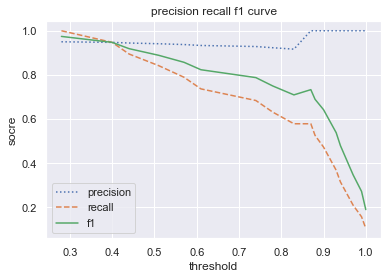

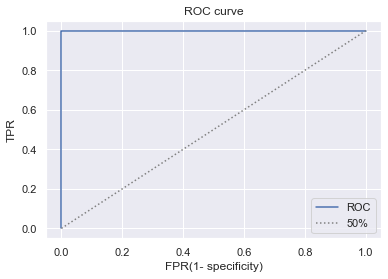

---------------------------------- max_eval ----------------------------------
threshold = 0.2800   max f1   = 0.9744   accuracy = 0.9998   AUC      = 1.0000
precision = 0.9500   recall   = 1.0000   FPR      = 0.0000   TPR      = 0.0000
---------------------------- threshold adjusting  ----------------------------
threshold = 0.5000   f1       = 0.8889   accuracy = 0.9996   AUC      = 1.0000
precision = 0.9412   recall   = 0.8421   
 [[11373     1]
 [    3    16]]


In [11]:
X1 = X.drop(['Amount', 'AmountSta', 'AmountMin'], axis=1)
X2 = X.drop(['Amount', 'AmountMin', 'AmountRob'], axis=1)
X3 = X.drop(['Amount', 'AmountRob', 'AmountSta'], axis=1)

model = RandomForestClassifier(random_state=0)
split_fit_score(X1, y, model)

# sampling

## over sampling : SMOTE

In [12]:
# N/P 데이터 불균형 때문에, 인위적으로 데이터의 양을 조작
# KNN의 원리를 이용하여 가까운 특성을 지닌 것들로 데이터의 양을 유사하게 늘림

In [13]:
# !pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [15]:
# smote    = SMOTE(sampling_strategy=, random_state=, k_neighbors=, )
# smote.fit_resample(X, y)
# 일반적으로 원본을 샘플링 한 후, scale

smote = SMOTE(random_state=0)

# test는 절대 resample하지 않음, 학습할 데이터 train만 하는 것
# 0/1 중에 비율이 적은 쪽을 oversampling하여 비율이 큰 쪽으로 맞춤

print('before oversampling',X_train.shape, y_train.shape)
print('before oversampling',pd.Series(y_train).value_counts())

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('after oversampling',X_train_over.shape, y_train_over.shape)
print('after oversampling',pd.Series(y_train_over).value_counts())


before oversampling (45569, 32) (45569,)
before oversampling 0    45490
1       79
Name: Class, dtype: int64
after oversampling (90980, 32) (90980,)
after oversampling 0    45490
1    45490
Name: Class, dtype: int64


In [16]:
# score before scale
model = RandomForestClassifier(random_state=0)
model.fit(X_train_over, y_train_over)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test))

0.9997366804178004
0.9268292682926829


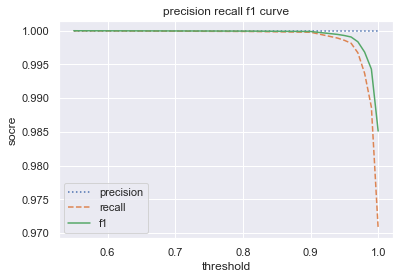

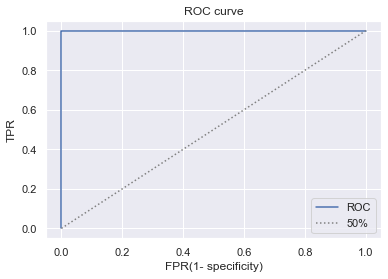

---------------------------------- max_eval ----------------------------------
threshold = 0.5500   max f1   = 1.0000   accuracy = 1.0000   AUC      = 1.0000
precision = 1.0000   recall   = 1.0000   FPR      = 0.0000   TPR      = 0.0000
---------------------------- threshold adjusting  ----------------------------
threshold = 0.5000   f1       = 1.0000   accuracy = 1.0000   AUC      = 1.0000
precision = 1.0000   recall   = 1.0000   
 [[11305     0]
 [    0  9170]]


In [17]:
# score after Standar scale (X2)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

X2_train_over, y_train_over = smote.fit_resample(X2_train, y_train)

X2_over = X2_train_over.append(X2_test)
y_over  = y_train_over.append(y_test)

momdel = RandomForestClassifier(random_state=0)
split_fit_score(X2_over, y_over, model)

## under sampling : NearMiss

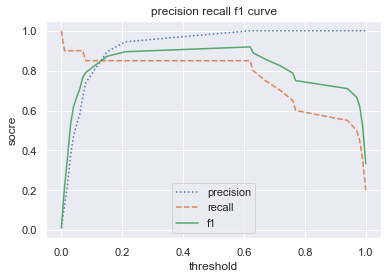

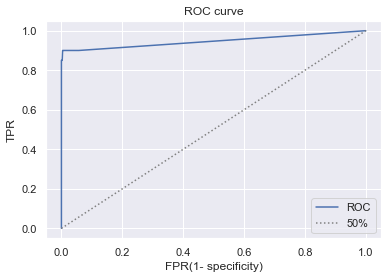

---------------------------------- max_eval ----------------------------------
threshold = 0.6200   max f1   = 0.9189   accuracy = 0.9983   AUC      = 0.9470
precision = 1.0000   recall   = 0.8500   FPR      = 0.0131   TPR      = 0.9000
---------------------------- threshold adjusting  ----------------------------
threshold = 0.5000   f1       = 0.9189   accuracy = 0.9987   AUC      = 0.9470
precision = 1.0000   recall   = 0.8500   
 [[2291    0]
 [   3   17]]


In [26]:
# nearmiss = NearMiss(sampling_strategy=, n_neighbors=)
# 적은 쪽에 맞춤

nearmiss = NearMiss()
X_train_under, y_train_under = nearmiss.fit_resample(X_train, y_train)

X_under = X_train_under.append(X_test)
y_under = y_train_under.append(y_test)

split_fit_score(X_under, y_under)

In [30]:
# score after Standar scale (X2)
nearmiss = NearMiss()
X2_train_under, y_train_under = nearmiss.fit_resample(X2_train, y_train)

X2_under = X2_train_under.append(X_test)
y_under = y_train_under.append(y_test)

# split_fit_score(X2_under, y_under)

# plot

In [ ]:
# V14, V17은 상관분석상 관계가 있음을 확인

In [32]:
# print(df['V17'].describe())
# sns.boxplot(x=df['V17'].value_counts())
# sns.swarmplot(x=df['V17'].value_counts())

count    56962.000000
mean         0.114297
std          0.952220
min        -18.587366
25%         -0.370313
50%          0.047819
75%          0.521784
max          9.253526
Name: V17, dtype: float64


In [ ]:
# print(df['V14'].describe())
# sns.boxplot(x=df['V14'].value_counts())
# sns.swarmplot(x=df['V14'].value_counts())

In [ ]:
# sns.boxplot(x='Class', y='V14', data=df)

# drop outlier

In [ ]:
# median : 중앙값, 값을 중복을 제거하여 순서대로 나열했을 때 중앙에 있는 값
# quarter : 중앙값을 기준으로 4등분

In [ ]:
# casting excercise
list = [1, 2, 3, 4]; print(type(list))

# list to series


In [ ]:
# quarter

# srs to array : srs.values